<a href="https://colab.research.google.com/github/crisouzajr/Processamento-de-Linguagem-Natural/blob/Detector-de-SPAN/Classifica%C3%A7%C3%A3o_de_mensagens_SPAN_DETEC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICAÇÃO DE MENSAGENS: Detector de SPAN

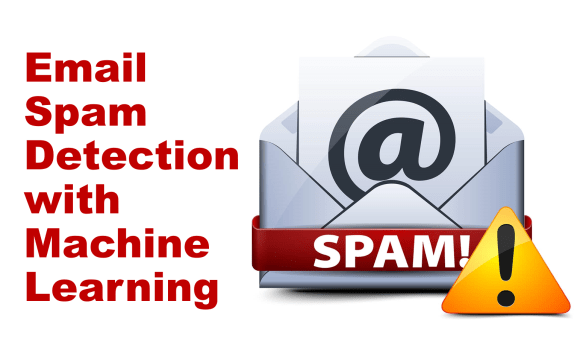

# INTRODUÇÃO

Projeto contendo modelos TF-IDF e Randon Forest desenvolvidos para classificação de mensagens.

A intensão principal do projeto é determinar quais mensagens tem a propensão de serem maliciosas no sentido de carregar virus e mallwares invasores de sistemas. 

In [1]:
# Importando as bibliotecas necessárias ao estudo.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
from sklearn.metrics import confusion_matrix
import nltk

# Análise Exploratória da Bade de Dados

In [2]:
df = pd.read_csv('spamdata.csv')
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
"""
Vamos usar o groupby para usar a descrição por categoria, 
dessa forma podemos começar a pensar sobre os recursos 
que separam os emails e os spam! 
"""

df.groupby('Category').describe()

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [5]:
""" Criando uma nova coluna para determinar qual é o comprimento das mensagens."""

df['Length'] = df['Message'].apply(len)
df.head(3)

,Category,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155


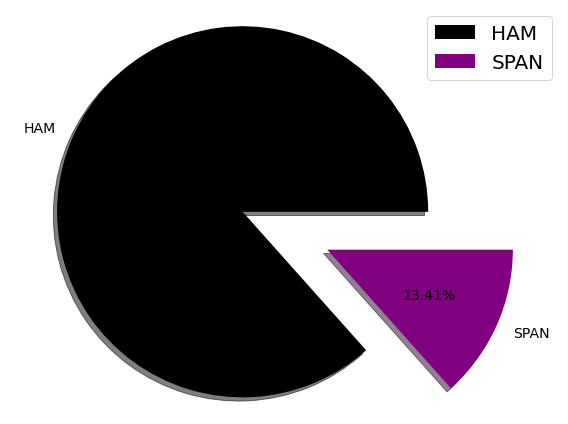

In [6]:
# Vamos ver a porcentagem de email e spam em nosso conjunto de dados

explode = (0.5,0)  
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(df['Category'].value_counts(),colors=('black','purple'), 
        explode=explode,labels=['HAM','SPAN'], autopct='%1.2f%%',
        shadow=True, textprops={'fontsize': 14})

# Equal garante que o gráfico será um círculo

ax1.axis('equal')  
plt.tight_layout()
plt.legend(prop={'size': 20})
plt.show()

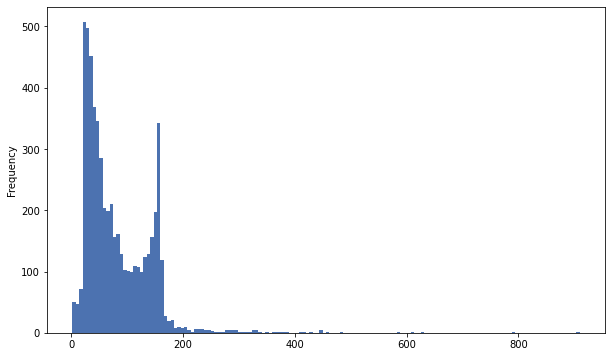

In [7]:
# Verificando a distribuição do comprimento das mensagens pela quantidade total.

plt.figure(figsize=(10,6))
df['Length'].plot.hist(bins = 150)

In [8]:
# Análise Estatística utilizando a coluna que contabiliza o total de palavras por mensagem.

df['Length'].describe()

count    5572.000000
mean       80.368988
std        59.926946
min         2.000000
25%        35.750000
50%        61.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [9]:
# Utilizando o iloc para verificar qual mensagem é a que contem maior comprimento de palavras (910).

df[df['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Processamento da base de dados linguística (NPL).

Para que se possa realizar a criação dos modelos de ML, é importante garantir que a base de dados esteja em formato de matrizes esparsas de forma que o modelo consigo através das redes neurais classificar e categorizar as palavras de acordo com sua localização dentro de um espeço vetorial.

* Limpando o texto: remoção de pontuação, Stop Word
* Vetorização
* Sparsing

In [10]:
# Importando as bibliotecas necessárias para o processamento de linguagem natural.

import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Remoção de Pontuação e Stopword**

In [11]:
# Criando uma função para: remover pontuação, remover stopwords, e então retornar o texto limpo.

def text_process(mess):
   
    # Verificando se existem palavras acentuadas.
    nopunc = [char for char in mess if char not in string.punctuation]

    # Juntando as palavras para formar uma string (frase).
    nopunc = ''.join(nopunc)
    
    # Removendo stopwords.
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [12]:
# Verificando as mensagens processadas.

XXX = df['Message'].head(5).apply(text_process)
XXX

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [13]:
# Salvando datafre em um arquivo tsv.

XXX.to_csv("see.tsv", sep="\t")

## **Vectorização**

In [14]:
"""
Com as mensagens codificadas em listas, e precisamos converter cada uma 
para um vetor com o qual os modelos de algoritmo do 
SciKit Learn possam ler e fazer e trabalhar.
"""

bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Message'])

In [15]:
# Verificando o número total de palavras que foram vetorizadas.

print(len(bow_transformer.vocabulary_))

11422


In [16]:
# Verificando em um texto a contagem de palavras como um vetor

message4 = df['Message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [17]:
# Verificando o comprimento da string

len(message4)

49

In [18]:
# Verificando a representação vetorial do objeto criado.

bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4066)	2
  (0, 4627)	1
  (0, 5258)	1
  (0, 6201)	1
  (0, 6219)	1
  (0, 7183)	1
  (0, 9551)	2
(1, 11422)


In [19]:
# Verificando quais palavras se repetem no conjunto de dados.

print(bow_transformer.get_feature_names()[4066])
print(bow_transformer.get_feature_names()[9551])

U
say


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## **Matriz Esparsa**

In [20]:
# Tranformando todo o texto em uma matrix esparsa.

messages_bow = bow_transformer.transform(df['Message'])

In [21]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11422)
Amount of Non-Zero occurences:  50500


In [22]:
''' 
Refere-se a uma matriz de números que inclui muitos 
zeros ou valores que não afetarão significativamente um cálculo.
'''

sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.07934838914285262


# Modelos de Machine Learning

## **TF-IDF**

In [23]:
'''
Essa técnica de NPL é utilizada para verificar no corpus do texto, quais são as
palavras raras (incomuns), que se repetem em diferentes textos, de foma que se
possa fazer uma comparação de similaridade entre n textos vetorizados.
Logo, essa técnica classifica textos em um espaço vetorial.'''

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(messages_bow)
print(tfidf4)

  (0, 11160)	0.23026685592418913
  (0, 10962)	0.19073428545061483
  (0, 8914)	0.24704652376837993
  (0, 8333)	0.17046869292195632
  (0, 7665)	0.26403384065473806
  (0, 7552)	0.31253856260694546
  (0, 6934)	0.1834692413608692
  (0, 6903)	0.15158474664662352
  (0, 6214)	0.18915557732842803
  (0, 5766)	0.24984711892976424
  (0, 5215)	0.26870593862526665
  (0, 5214)	0.29835184088197164
  (0, 4651)	0.31253856260694546
  (0, 2058)	0.24203960256420656
  (0, 1480)	0.31253856260694546
  (0, 1107)	0.2882862016308418
  (1, 11069)	0.40059731892909933
  (1, 10695)	0.20657545787061052
  (1, 8587)	0.5043175634668231
  (1, 7698)	0.3767229062690876
  (1, 3062)	0.2911862458354422
  (1, 2449)	0.5619631532224204
  (2, 11120)	0.19104387220509106
  (2, 11081)	0.15898145347176754
  (2, 10683)	0.13995540820792943
  :	:
  (5568, 6879)	0.31367469776242124
  (5568, 6688)	0.47781076401785183
  (5568, 6351)	0.5575721048646767
  (5568, 4878)	0.3853122086093004
  (5569, 10196)	0.520467167163554
  (5569, 8249)	0.4328

## **Random Forrest**

* Aqui é a criação do modelo de ML que irá classificar a base de textos que foi processada até ser transformada e matrizes vetorizadas, esparsadas e processadas em TF-IDF de forma que a classificação pelo modelo será feita de forma automatizada pela Floresta Randômica.

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
classifier.fit(tfidf4, df['Category'])

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

Vamos tentar classificar nossa única mensagem aleatória e verificar como fazemos:

In [25]:
# Vamos utilizar uma mensagem como exemplo e verificar como o modelo de ML à classifica.

print('predicted:', classifier.predict(tfidf4)[0])
print('expected:', df.Category[3])

predicted: ham
expected: ham


Vamos verificar a precisão do nosso modelo em todo o conjunto de dados

In [26]:
'''Criando um objeto que guarda todas as predição para 
posteriormente verificar a metrica do modelo de classificação.'''

all_predictions = classifier.predict(messages_bow)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [27]:
# Criando relatório de classificação do modelo.

from sklearn.metrics import classification_report
print (classification_report(df['Category'], all_predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      4825
        spam       1.00      0.96      0.98       747

    accuracy                           0.99      5572
   macro avg       1.00      0.98      0.99      5572
weighted avg       0.99      0.99      0.99      5572



In [28]:
# Verificando a métrica do modelo

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(df['Category'], all_predictions))

Accuracy: 0.9940775305096913


### **Treinamento e Teste**

In [29]:
# Separando a base entre TREINO E TESTE

from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['Message'], df['Category'], test_size=0.2)


print('TREINO:', len(msg_train))
print('TESTE:', len(msg_test))
print('TREINO + TESTE:', len(msg_train) + len(msg_test))

TREINO: 4457
TESTE: 1115
TREINO + TESTE: 5572


### **PIPELINE**

In [30]:
'''
Vamos executar nosso modelo novamente e prever o conjunto
de teste. Vamos criar e usar um pipeline para este propósito.
'''

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings para contagens inteiras de token
    ('tfidf', TfidfTransformer()),  # contagens de inteiros para pontuações TF-IDF ponderadas
    ('classifier', RandomForestClassifier()),  # Treinar o TF-IDF vectors com p SVM
])

In [31]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fe049da7440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [32]:
predictions = pipeline.predict(msg_test)

### **Matriz de Confusão**

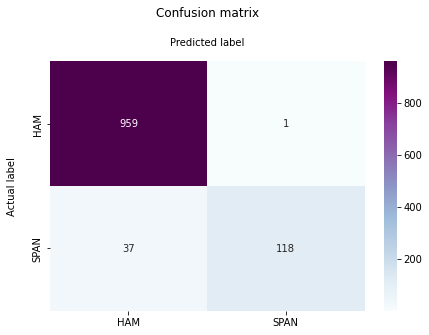

In [33]:
'''
O Confusion Matrix irá conter as previsões corretas que 
nosso modelo fez no set, bem como as previsões incorretas.
'''

from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(label_test,predictions)
class_names=[0,1] # nome das classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Criando mapa de calor
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="BuPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
ax.xaxis.set_ticklabels(['HAM', 'SPAN']) 
ax.yaxis.set_ticklabels(['HAM', 'SPAN'])
plt.show()

classificação

In [34]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       996
        spam       0.76      0.99      0.86       119

    accuracy                           0.97      1115
   macro avg       0.88      0.98      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [35]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(predictions,label_test))

Accuracy: 0.9659192825112107
